## <center>  Data Wrangling WeRateDogs </center>

## Gathering data

1. **Twitter archive file:** download this file manually by clicking the following link: twitter_archive_enhanced.csv

- **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import requests
import urllib
import tweepy #install if not preinstalled through pip
import json
import os
import seaborn as sns
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

# Gather

### Import the data `twitter-archive-enhanced.csv`




In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### (`tweet_json.txt` already provide by Udacity) Below is the demonstration to extract from twitter API

### Importing the JSON file from Twitter API 
##### twitter_api.py: This is the Twitter API code to gather some of the required data for the project. Demonstration of how it works
Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

**NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:**
df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
**NOTE TO REVIEWER: this student had mobile verification issues so the following**
Twitter API code was sent to this student from a Udacity instructor
Tweet IDs for which to gather additional data via Twitter's API
  
tweet_ids = df.tweet_id.values
len(tweet_ids)

###################################################
###### PROVIDED BY UDACITY. NO NEED TO RUN! #######
###################################################

os.listdir('.')

#### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
#### This loop will likely take 20-30 minutes to run because of Twitter's rate limit
     for tweet_id in tweet_ids:
         count += 1
         print(str(count) + ": " + str(tweet_id))
         try:
             tweet = api.get_status(tweet_id, tweet_mode='extended')
             print("Success")
             json.dump(tweet._json, outfile)
             outfile.write('\n')
         except tweepy.TweepError as e:
             print("Fail")
             fails_dict[tweet_id] = e
             pass
 end = timer()
 print(end - start)
 print(fails_dict)

In [4]:
# Append the JSON to a list
tweets = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweets.append(json.loads(line))

In [5]:
data_ = []

for tweet in tweets:
    
    tweet_id = tweet['id']
    retweet_count = tweet['retweet_count']
    retweeted = tweet['retweeted']
    favorite_count = tweet['favorite_count']
    followers_count = tweet['user']['followers_count']
    text = tweet['full_text']
    source = tweet['source']
    
    data_.append({'id':tweet_id,
                  'text': text,
                  'source': source,
                  'retweeted': retweeted,
                  'retweet_count': retweet_count,
                  'favorite_count': favorite_count,
                  'followers_count': followers_count})
    
tweets_api_df = pd.DataFrame(data_, columns=['id', 'text', 'source', 'retweeted',
                                             'retweet_count', 'favorite_count', 'followers_count'])


In [6]:
tweets_api_df.head(10)

,id,text,source,retweeted,retweet_count,favorite_count,followers_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",False,8853,39467,3200889
1,892177421306343426,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",False,6514,33819,3200889
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",False,4328,25461,3200889
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",False,8964,42908,3200889
4,891327558926688256,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",False,9774,41048,3200889
5,891087950875897856,Here we have a majestic great white breaching ...,"<a href=""http://twitter.com/download/iphone"" r...",False,3261,20562,3200889
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,"<a href=""http://twitter.com/download/iphone"" r...",False,2158,12041,3200889
7,890729181411237888,When you watch your owner call another dog a g...,"<a href=""http://twitter.com/download/iphone"" r...",False,16716,56848,3200889
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,"<a href=""http://twitter.com/download/iphone"" r...",False,4429,28226,3200889
9,890240255349198849,This is Cassie. She is a college pup. Studying...,"<a href=""http://twitter.com/download/iphone"" r...",False,7711,32467,3200889


In [7]:
tweets_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2354 non-null   int64 
 1   text             2354 non-null   object
 2   source           2354 non-null   object
 3   retweeted        2354 non-null   bool  
 4   retweet_count    2354 non-null   int64 
 5   favorite_count   2354 non-null   int64 
 6   followers_count  2354 non-null   int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 112.8+ KB


### Import images prediction file `image-predictions.tsv` using request

In [8]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
os.listdir('.')

['.ipynb_checkpoints',
 'act_report.docx',
 'image_predictions.tsv',
 'README.md',
 'tweet_json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'wrangle_act.ipynb',
 'wrangle_report.docx']

In [9]:
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
655,682242692827447297,https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg,1,snorkel,0.504983,False,loggerhead,0.345298,False,scuba_diver,0.074754,False
401,673689733134946305,https://pbs.twimg.com/media/CVltNgxWEAA5sCJ.jpg,1,Chesapeake_Bay_retriever,0.382220,True,American_Staffordshire_terrier,0.350140,True,seat_belt,0.098874,False
1429,772877495989305348,https://pbs.twimg.com/ext_tw_video_thumb/77287...,1,tabby,0.218303,False,Norwegian_elkhound,0.138523,True,wombat,0.074217,False
514,676237365392908289,https://pbs.twimg.com/media/CWJ6Sc-WwAAlpI6.jpg,1,French_bulldog,0.961996,True,Chihuahua,0.021793,True,Boston_bull,0.006916,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [10]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Assessing the data

### Visual Assessment
Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [11]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
tweets_api_df

,id,text,source,retweeted,retweet_count,favorite_count,followers_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",False,8853,39467,3200889
1,892177421306343426,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",False,6514,33819,3200889
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",False,4328,25461,3200889
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",False,8964,42908,3200889
4,891327558926688256,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",False,9774,41048,3200889
...,...,...,...,...,...,...,...
2349,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,"<a href=""http://twitter.com/download/iphone"" r...",False,41,111,3201018
2350,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,"<a href=""http://twitter.com/download/iphone"" r...",False,147,311,3201018
2351,666033412701032449,Here is a very happy pup. Big fan of well-main...,"<a href=""http://twitter.com/download/iphone"" r...",False,47,128,3201018
2352,666029285002620928,This is a western brown Mitsubishi terrier. Up...,"<a href=""http://twitter.com/download/iphone"" r...",False,48,132,3201018


In [13]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


###  Assessment of the data
#### `df` dataframe

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
df[df.expanded_urls.isnull()].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1080,738891149612572673,7.384119e+17,3.589728e+08,2016-06-04 00:32:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@mount_alex3 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jerry just apuppologized to me. He said there ...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
576,800859414831898624,8.008580e+17,2.918590e+08,2016-11-22 00:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@SkyWilliams doggo simply protecting you from ...,NaN,NaN,NaN,NaN,11,10,None,doggo,None,None,None
1844,675849018447167488,6.758457e+17,4.196984e+09,2015-12-13 01:25:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is being demoted to a 9/10 for not we...,NaN,NaN,NaN,NaN,9,10,None,None,None,None,None


In [16]:
# Check duplicates
df.duplicated().sum()

0

In [17]:
# Check the amount of NaN values in each column
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
df.loc[(df[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [19]:
df.text.sample(3)

1395    This is Cooper. He began to tear up when his b...
963     This is Meyer. He has to hold somebody's hand ...
1274    From left to right:\nCletus, Jerome, Alejandro...
Name: text, dtype: object

#### `tweets_api_df` dataframe

In [20]:
tweets_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2354 non-null   int64 
 1   text             2354 non-null   object
 2   source           2354 non-null   object
 3   retweeted        2354 non-null   bool  
 4   retweet_count    2354 non-null   int64 
 5   favorite_count   2354 non-null   int64 
 6   followers_count  2354 non-null   int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 112.8+ KB


In [21]:
# Check duplicates
tweets_api_df.duplicated().sum()

0

In [22]:
tweets_api_df.sample(5)

,id,text,source,retweeted,retweet_count,favorite_count,followers_count
708,785170936622350336,This is Hero. He was enjoying the car ride unt...,"<a href=""http://twitter.com/download/iphone"" r...",False,5639,13491,3200901
1913,674318007229923329,This is Lennon. He's in quite the predicament....,"<a href=""http://twitter.com/download/iphone"" r...",False,570,1516,3201003
1619,684926975086034944,Meet Bruiser &amp; Charlie. They are the best ...,"<a href=""http://twitter.com/download/iphone"" r...",False,552,3849,3200950
84,876120275196170240,"Meet Venti, a seemingly caffeinated puppoccino...","<a href=""http://twitter.com/download/iphone"" r...",False,4903,28490,3200891
200,853760880890318849,Say hello to Alice. I'm told she enjoys car ri...,"<a href=""http://twitter.com/download/iphone"" r...",False,6403,30414,3200892


In [23]:
tweets_api_df.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

In [24]:
tweets_api_df.text.sample(3)

1719    This is Reggie. His Santa hat is a little big....
866     RT @dog_rates: "Tristan do not speak to me wit...
1704    This guy's dog broke. So sad. 9/10 would still...
Name: text, dtype: object

#### `image_predictions_df` dataframe

In [25]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
202,669683899023405056,https://pbs.twimg.com/media/CUsx8q_WUAA-m4k.jpg,1,Pomeranian,0.998275,True,Chihuahua,0.000605,True,Pekinese,0.000516,True
867,697575480820686848,https://pbs.twimg.com/media/Ca5JMvMUsAAGMll.jpg,1,Siamese_cat,0.256698,False,whippet,0.119805,True,bull_mastiff,0.102595,True
1787,829501995190984704,https://pbs.twimg.com/media/C4L7p19W8AA3Fs_.jpg,1,French_bulldog,0.950851,True,Pekinese,0.015200,True,pug,0.011094,True
1630,805487436403003392,https://pbs.twimg.com/media/Cy2qiTxXcAAtQBH.jpg,3,shield,0.587830,False,barrel,0.090180,False,sundial,0.069199,False


In [27]:
image_predictions_df.duplicated().sum()

0

### Quality
Completeness, validity, accuracy, consistency (content issues)

- **First of all, replace "None" string  values to np.nan**

#### Duplicated quality issues
- Rename tweet_id to id for standardize (df, image_predictions_df)
- Erroneous datatype assigned to tweet_id/id column (int -> str)
- Cleaning the values of source column (df, tweets_api_df)
- Removing retweets and replies (df, tweets_api_df)
- The information of text column is truncated to 50 characters, we could lost information to extract from the text (df,tweets_api_df)

#### df table
- Erroneous datatypes to timestamp
- Rename timestamp to date

#### tweets_api_df table
- Extracting and cleaning ratings properly from the text column

#### image_predictions_df
- Adjusting the letter case on each value in the prediction columns to have a consistent format
- Providing more descriptive name for the columns about the model predictions


### Tidiness
- Remove unnecessary columns
    - df
        - source (Duplicate with tweets_api_df)
        - in_reply_to_status_id
        - in_reply_to_user_id
        - text
        - retweeted_status_id
        - retweeted_status_user_id
        - retweeted_status_timestamp
        - rating_numerator (Since we extract on the tweets_api_df)
        - rating_denominator (Since we extract on the tweets_api_df)
        - expanded_urls	
    - tweets_api_df
        - text
        - retweeted    
    - image_predictions_df
        - img_num

- The last four columns in `df` table (doggo, floofer, pupper, puppo) should be one column contain these values
    - Remove original columns
    - Replace " " to np.nan on the new column

- Combine all tables

# Data Cleaning

In [28]:
df_clean = df.copy()
tweets_api_df_clean = tweets_api_df.copy()
image_predictions_df_clean = image_predictions_df.copy()

### Quality

**Replace "None" values to np.nan**

Filter the "None" values and replace them to np.nan

In [29]:
df_clean.replace(to_replace=["None"], value=np.nan, inplace=True)
tweets_api_df_clean.replace(to_replace=["None"], value=np.nan, inplace=True)
image_predictions_df_clean.replace(to_replace=["None"], value=np.nan, inplace=True)

In [30]:
print('None values in df_clean:', df_clean[df_clean == "None"].sum().sum())
print('None values in tweets_api_df_clean:', tweets_api_df_clean[tweets_api_df_clean == "None"].sum().sum())
print('None values in image_predictions_df_clean:', image_predictions_df_clean[image_predictions_df_clean == "None"].sum().sum())

None values in df_clean: 0.0
None values in tweets_api_df_clean: 0.0
None values in image_predictions_df_clean: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


**`(df_clean, image_predictions_df_clean)`: Rename tweet_id to id for standardize**

Renaming the columns in both dataset with pandas method

In [31]:
df_clean.rename(columns={'tweet_id':'id'}, inplace=True)
image_predictions_df_clean.rename(columns={'tweet_id':'id'}, inplace=True)

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [33]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       2075 non-null   int64  
 1   jpg_url  2075 non-null   object 
 2   img_num  2075 non-null   int64  
 3   p1       2075 non-null   object 
 4   p1_conf  2075 non-null   float64
 5   p1_dog   2075 non-null   bool   
 6   p2       2075 non-null   object 
 7   p2_conf  2075 non-null   float64
 8   p2_dog   2075 non-null   bool   
 9   p3       2075 non-null   object 
 10  p3_conf  2075 non-null   float64
 11  p3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**`(All tables)`:Erroneous datatype assigned to tweet_id/id column (int -> str)**

Changing the datatype from int to str in all tables with pandas astype method

In [34]:
df_clean['id'] = df_clean.id.astype('str')
tweets_api_df_clean['id'] = tweets_api_df_clean.id.astype('str')
image_predictions_df_clean['id'] = image_predictions_df_clean.id.astype('str')

In [35]:
print(df_clean.id.dtype,'\n', 
tweets_api_df_clean.id.dtype,'\n', 
image_predictions_df_clean.id.dtype)

object 
 object 
 object


**`(df_clean, tweets_api_df_clean)`: Cleaning the values of `source` column**

Cleaning those values with extract regular expressions

In [36]:
# learnt from https://stackoverflow.com/a/2076356
df_clean['source'] = df_clean.source.str.extract('"([^"]*)"')
tweets_api_df_clean['source'] = tweets_api_df_clean.source.str.extract('"([^"]*)"')

In [37]:
df_clean.source.sample(5)

1992    http://twitter.com/download/iphone
1539    http://twitter.com/download/iphone
1638    http://twitter.com/download/iphone
1694    http://twitter.com/download/iphone
602     http://twitter.com/download/iphone
Name: source, dtype: object

In [38]:
tweets_api_df_clean.source.sample(5)

2292    http://twitter.com/download/iphone
925     http://twitter.com/download/iphone
2290    http://twitter.com/download/iphone
1601    http://twitter.com/download/iphone
705     http://twitter.com/download/iphone
Name: source, dtype: object

**`(df_clean, tweets_api_df_clean)`:Removing retweets and replies (df, tweets_api_df)**

Filter the retweets and replies that don't are NaN values and remove them

In [39]:
df_clean.retweeted_status_id.notnull().sum()

181

In [40]:
df_clean.in_reply_to_status_id.notnull().sum()

78

In [41]:
tweets_api_df_clean = tweets_api_df_clean[tweets_api_df_clean.retweeted == False]
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]
df_clean = df_clean[df_clean.in_reply_to_status_id.isnull()]

In [42]:
retweets_df_clean = df_clean.retweeted_status_id.notnull().sum()
replies_df_clean = df_clean.in_reply_to_status_id.notnull().sum()
retweets_tweets_api_df_clean = tweets_api_df_clean[tweets_api_df_clean.retweeted == True].shape[0]


In [43]:
print(retweets_df_clean,'\n', 
replies_df_clean,'\n',
retweets_tweets_api_df_clean)

0 
 0 
 0


**`(df_clean, tweets_api_df_clean)`:The information of text column is truncated to 50 characters, we could lose information to extract from the text**

Using the set options of pandas

In [44]:
pd.set_option('display.max_colwidth', -1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [45]:
df_clean.text.sample(5)

2190    Meet Jaycob. He got scared of the vacuum. Hide &amp; seek champ. Almost better than Kony. Solid shampoo selection. 10/10 https://t.co/952hUV6RiK
1825    Three generations of pupper. 11/10 for all https://t.co/tAmQYvzrau                                                                              
2323    Here we have an Austrian Pulitzer. Collectors edition. Levitates (?). 7/10 would garden with https://t.co/NMQq6HIglK                            
848     This is Juno. She can see your future. 12/10 h*ckin mesmerizing af https://t.co/Z69mShifuk                                                      
2035    This is Oscar. He's ready for Christmas. 11/10 https://t.co/TON0Irzgwr                                                                          
Name: text, dtype: object

In [46]:
tweets_api_df_clean.text.sample(5)

932     Here we are witnessing an isolated squad of bouncing doggos. Unbelievably rare for this time of year. 11/10 for all https://t.co/CCdlwiTwQf 
2160    Meet Ronduh. She's a Finnish Checkered Blitzkrieg. Ears look fake. Shoes on point. 10/10 would pet extra well https://t.co/juktj5qiaD       
1315    Here's a sneak peek of me on spring break. 10/10 so many tired pups these days https://t.co/6aJrjKfNqX                                      
806     Doggo will persevere. 13/10\nhttps://t.co/yOVzAomJ6k                                                                                        
573     RT @dog_rates: This is Anakin. He strives to reach his full doggo potential. Born with blurry tail tho. 11/10 would still pet well https://…
Name: text, dtype: object

**`df_clean`: Erroneous datatypes to timestamp**

Changing the datatype with pandas function

In [47]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [49]:
df_clean.timestamp.sample(1)

1284   2016-03-12 02:28:06+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

**`df_clean`: Rename timestamp to date**

Renaming that columns with pandas

In [50]:
df_clean.rename(columns={'timestamp': 'date'}, inplace=True)

In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   date                        2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

**`tweets_api_df_clean`: Extracting and cleaning ratings properly from the text column**

Use regular expression to extract the rating from text column and cleaning rating_numerator column properly

In [52]:
rating = tweets_api_df_clean['text'].str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
tweets_api_df_clean = tweets_api_df_clean.join(rating)
tweets_api_df_clean.rename(columns={0: 'rating_numerator', 1: 'rating_denominator'}, inplace=True)

In [53]:
tweets_api_df_clean.sample(5)

,id,text,source,retweeted,retweet_count,favorite_count,followers_count,rating_numerator,rating_denominator
982,749317047558017024,This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB,http://twitter.com/download/iphone,False,2509,6076,3200943,12,10
871,761334018830917632,This is Bruce. I really want to hear the joke he was told. 10/10 for chuckle pup https://t.co/ErPLjjJOKc,http://twitter.com/download/iphone,False,1669,5792,3200908,10,10
2155,669583744538451968,Special dog here. Pretty big. Neck kinda long for dog. Cool spots. Must be a Dalmatian variant. 6/10 would still pet https://t.co/f8GXeDbFzu,http://twitter.com/download/iphone,False,1017,1587,3201011,6,10
610,797165961484890113,@JODYHiGHROLLER it may be an 11/10 but what do I know 😉,http://twitter.com/download/iphone,False,32,256,3200900,11,10
318,834477809192075265,RT @dog_rates: This is Leo. He was a skater pup. She said see ya later pup. He wasn't good enough for her. 12/10 you're good enough for me…,http://twitter.com/download/iphone,False,12224,0,3200890,12,10


In [54]:
tweets_api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2354 non-null   object
 1   text                2354 non-null   object
 2   source              2354 non-null   object
 3   retweeted           2354 non-null   bool  
 4   retweet_count       2354 non-null   int64 
 5   favorite_count      2354 non-null   int64 
 6   followers_count     2354 non-null   int64 
 7   rating_numerator    2354 non-null   object
 8   rating_denominator  2354 non-null   object
dtypes: bool(1), int64(3), object(5)
memory usage: 167.8+ KB


**`image_predictions_df_clean`:Adjusting the letter case on each value in the prediction columns to have a consistent format**

Using the pandas method for string

In [55]:
image_predictions_df_clean['p1'] = image_predictions_df_clean['p1'].str.lower()
image_predictions_df_clean['p2'] = image_predictions_df_clean['p2'].str.lower()
image_predictions_df_clean['p3'] = image_predictions_df_clean['p3'].str.lower()

In [56]:
image_predictions_df_clean.sample(5)

,id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
438,674422304705744896,https://pbs.twimg.com/media/CVwHgblWcAACWOD.jpg,1,golden_retriever,0.964497,True,labrador_retriever,0.009006,True,tennis_ball,0.007139,False
668,683030066213818368,https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg,1,boxer,0.722218,True,bull_mastiff,0.193804,True,french_bulldog,0.055194,True
666,682788441537560576,https://pbs.twimg.com/media/CXnAdosWAAEMGCM.jpg,1,toyshop,0.375610,False,orange,0.094538,False,teddy,0.039808,False
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,italian_greyhound,0.831757,True,toy_terrier,0.043306,True,chihuahua,0.036773,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**`image_predictions_df_clean`: Providing more descriptive name for the columns about the model predictions**

Creating dictionary with the new name of the columns and using pandas to rename

In [57]:
new_name_columns = {'p1': 'prediction_1',
                    'p1_conf': 'prediction_1_confidence',
                    'p1_dog': 'prediction_1_isdog',
                    'p2': 'prediction_2',
                    'p2_conf': 'prediction_2_confidence',
                    'p2_dog': 'prediction_2_isdog',
                    'p3': 'prediction_3',
                    'p3_conf': 'prediction_3_confidence',
                    'p3_dog': 'prediction_3_isdog'}

image_predictions_df_clean.rename(columns=new_name_columns, inplace=True)

In [58]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2075 non-null   object 
 1   jpg_url                  2075 non-null   object 
 2   img_num                  2075 non-null   int64  
 3   prediction_1             2075 non-null   object 
 4   prediction_1_confidence  2075 non-null   float64
 5   prediction_1_isdog       2075 non-null   bool   
 6   prediction_2             2075 non-null   object 
 7   prediction_2_confidence  2075 non-null   float64
 8   prediction_2_isdog       2075 non-null   bool   
 9   prediction_3             2075 non-null   object 
 10  prediction_3_confidence  2075 non-null   float64
 11  prediction_3_isdog       2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Tidiness

**`df_clean`: Removing unnecessary columns (in_reply_to_status_id, in_reply_to_user_id, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator)**

Removing the rest of the columns that yet not be removed and will not be important for our analysis

In [59]:
df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 
'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   id       2097 non-null   object             
 1   date     2097 non-null   datetime64[ns, UTC]
 2   name     1494 non-null   object             
 3   doggo    83 non-null     object             
 4   floofer  10 non-null     object             
 5   pupper   230 non-null    object             
 6   puppo    24 non-null     object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 131.1+ KB


**`tweets_api_df_clean`: Remove unnecessary columns (text, retweeted)**

Removing the columns with pandas

In [61]:
tweets_api_df_clean.drop(columns=['text','retweeted'], axis=1, inplace=True)

In [62]:
tweets_api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2354 non-null   object
 1   source              2354 non-null   object
 2   retweet_count       2354 non-null   int64 
 3   favorite_count      2354 non-null   int64 
 4   followers_count     2354 non-null   int64 
 5   rating_numerator    2354 non-null   object
 6   rating_denominator  2354 non-null   object
dtypes: int64(3), object(4)
memory usage: 147.1+ KB


**`image_predictions_df_clean`: Removing unnecessary columns (img_num)**

In [63]:
image_predictions_df_clean.drop(columns=['img_num'], axis=1, inplace=True)

In [64]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2075 non-null   object 
 1   jpg_url                  2075 non-null   object 
 2   prediction_1             2075 non-null   object 
 3   prediction_1_confidence  2075 non-null   float64
 4   prediction_1_isdog       2075 non-null   bool   
 5   prediction_2             2075 non-null   object 
 6   prediction_2_confidence  2075 non-null   float64
 7   prediction_2_isdog       2075 non-null   bool   
 8   prediction_3             2075 non-null   object 
 9   prediction_3_confidence  2075 non-null   float64
 10  prediction_3_isdog       2075 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 135.9+ KB


**`df_clean`: The last four columns in df dataframe (doggo, floofer, pupper, puppo) should be one column containing these values**

In [65]:
df_clean.loc[(df_clean[['doggo', 'floofer', 'pupper', 'puppo']].notnull()).sum(axis=1) > 1]

,id,date,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02+00:00,NaN,doggo,NaN,NaN,puppo
200,854010172552949760,2017-04-17 16:34:26+00:00,NaN,doggo,floofer,NaN,NaN
460,817777686764523521,2017-01-07 16:59:28+00:00,Dido,doggo,NaN,pupper,NaN
531,808106460588765185,2016-12-12 00:29:28+00:00,NaN,doggo,NaN,pupper,NaN
575,801115127852503040,2016-11-22 17:28:25+00:00,Bones,doggo,NaN,pupper,NaN
705,785639753186217984,2016-10-11 00:34:48+00:00,Pinot,doggo,NaN,pupper,NaN
733,781308096455073793,2016-09-29 01:42:20+00:00,NaN,doggo,NaN,pupper,NaN
889,759793422261743616,2016-07-31 16:50:42+00:00,Maggie,doggo,NaN,pupper,NaN
956,751583847268179968,2016-07-09 01:08:47+00:00,NaN,doggo,NaN,pupper,NaN
1063,741067306818797568,2016-06-10 00:39:48+00:00,just,doggo,NaN,pupper,NaN


In [66]:
col=['doggo', 'floofer', 'pupper', 'puppo']

df_clean['dog_stage'] = df_clean[col].apply(lambda x: ','.join(x.dropna()), axis=1)

In [67]:
df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [68]:
df_clean.replace(to_replace=[""], value=np.nan, inplace=True)

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   id         2097 non-null   object             
 1   date       2097 non-null   datetime64[ns, UTC]
 2   name       1494 non-null   object             
 3   dog_stage  336 non-null    object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 81.9+ KB


In [70]:
df_clean.sample(5)

,id,date,name,dog_stage
2199,668779399630725120,2015-11-23 13:13:28+00:00,Kevon,NaN
1795,677314812125323265,2015-12-17 02:30:09+00:00,Tassy,NaN
334,832682457690300417,2017-02-17 20:05:43+00:00,NaN,NaN
1424,697990423684476929,2016-02-12 03:47:39+00:00,Doug,NaN
1946,673705679337693185,2015-12-07 03:28:45+00:00,Dot,NaN


In [71]:
df_clean.dog_stage.value_counts()

pupper           221
doggo            72 
puppo            23 
doggo,pupper     9  
floofer          9  
doggo,puppo      1  
doggo,floofer    1  
Name: dog_stage, dtype: int64

#### `Combining all dataframes`

Combining all dataframes with pandas merge on ID

In [72]:
df_aux = pd.merge(left=df_clean, right=tweets_api_df_clean, how='right', left_on='id', right_on='id')
df_master = pd.merge(left=df_aux, right=image_predictions_df_clean, how='right', left_on='id', right_on='id')

#### Obs: I can change the NaN values to "None" so the columns will have the same number of observations, but I decided to keep the NaN values for better understanding of the data for future analysis, leading to inconsistence number of observations.

In [73]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       2075 non-null   object             
 1   date                     1971 non-null   datetime64[ns, UTC]
 2   name                     1447 non-null   object             
 3   dog_stage                303 non-null    object             
 4   source                   2073 non-null   object             
 5   retweet_count            2073 non-null   float64            
 6   favorite_count           2073 non-null   float64            
 7   followers_count          2073 non-null   float64            
 8   rating_numerator         2073 non-null   object             
 9   rating_denominator       2073 non-null   object             
 10  jpg_url                  2075 non-null   object             
 11  prediction_1             2075 

In [74]:
df_master.head(10)

,id,date,name,dog_stage,source,retweet_count,favorite_count,followers_count,rating_numerator,rating_denominator,jpg_url,prediction_1,prediction_1_confidence,prediction_1_isdog,prediction_2,prediction_2_confidence,prediction_2_isdog,prediction_3,prediction_3_confidence,prediction_3_isdog
0,892420643555336193,2017-08-01 16:23:56+00:00,Phineas,NaN,http://twitter.com/download/iphone,8853.0,39467.0,3200889.0,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,NaN,http://twitter.com/download/iphone,6514.0,33819.0,3200889.0,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Archie,NaN,http://twitter.com/download/iphone,4328.0,25461.0,3200889.0,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Darla,NaN,http://twitter.com/download/iphone,8964.0,42908.0,3200889.0,13,10,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Franklin,NaN,http://twitter.com/download/iphone,9774.0,41048.0,3200889.0,12,10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17+00:00,NaN,NaN,http://twitter.com/download/iphone,3261.0,20562.0,3200889.0,13,10,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12+00:00,Jax,NaN,http://twitter.com/download/iphone,2158.0,12041.0,3200889.0,13,10,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40+00:00,NaN,NaN,http://twitter.com/download/iphone,16716.0,56848.0,3200889.0,13,10,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51+00:00,Zoey,NaN,http://twitter.com/download/iphone,4429.0,28226.0,3200889.0,13,10,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51+00:00,Cassie,doggo,http://twitter.com/download/iphone,7711.0,32467.0,3200889.0,14,10,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True


# Storing, Analyzing, and Visualizing Data for this Project

## Storing the data

In [75]:
df_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analysis and Visualization

In [76]:
twitter_master_df = pd.read_csv('twitter_archive_master.csv')
twitter_master_df.head()

,id,date,name,dog_stage,source,retweet_count,favorite_count,followers_count,rating_numerator,rating_denominator,jpg_url,prediction_1,prediction_1_confidence,prediction_1_isdog,prediction_2,prediction_2_confidence,prediction_2_isdog,prediction_3,prediction_3_confidence,prediction_3_isdog
0,892420643555336193,2017-08-01 16:23:56+00:00,Phineas,NaN,http://twitter.com/download/iphone,8853.0,39467.0,3200889.0,13.0,10.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,NaN,http://twitter.com/download/iphone,6514.0,33819.0,3200889.0,13.0,10.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Archie,NaN,http://twitter.com/download/iphone,4328.0,25461.0,3200889.0,12.0,10.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Darla,NaN,http://twitter.com/download/iphone,8964.0,42908.0,3200889.0,13.0,10.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Franklin,NaN,http://twitter.com/download/iphone,9774.0,41048.0,3200889.0,12.0,10.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


## Insights

### Insight 1 
Let's check the mistakes when the top 1 prediction of the model didn't consider the image as a dog. For this I will set:
- False to `prediction_1_isdog` column

**Why didn't the model consider the image as a dog?**

Proportion: 0.2616867469879518


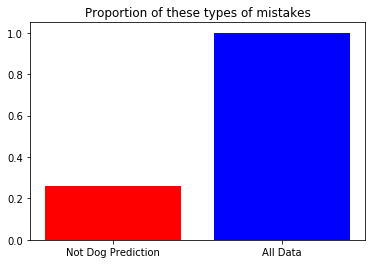

In [77]:
# Proportion of this situation
mistakes_df = twitter_master_df.query('prediction_1_isdog == False')
proportion_mistakes = mistakes_df.shape[0] / twitter_master_df.shape[0]
print('Proportion:', proportion_mistakes)

plt.bar([0, 1], [proportion_mistakes, 1], color=['red','blue'])
plt.title('Proportion of these types of mistakes')
plt.xticks([0,1], ['Not Dog Prediction', 'All Data'], fontsize=10);

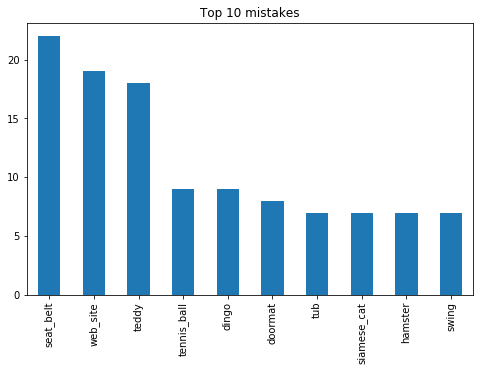

In [78]:
# Let's check the top 10 prediction mistakes made by the model and their frequency
mistakes_df.prediction_1.value_counts()[:10].plot(kind='bar', title='Top 10 mistakes', figsize=(8,5));

These types of mistakes is about 1/4 of the all dataset

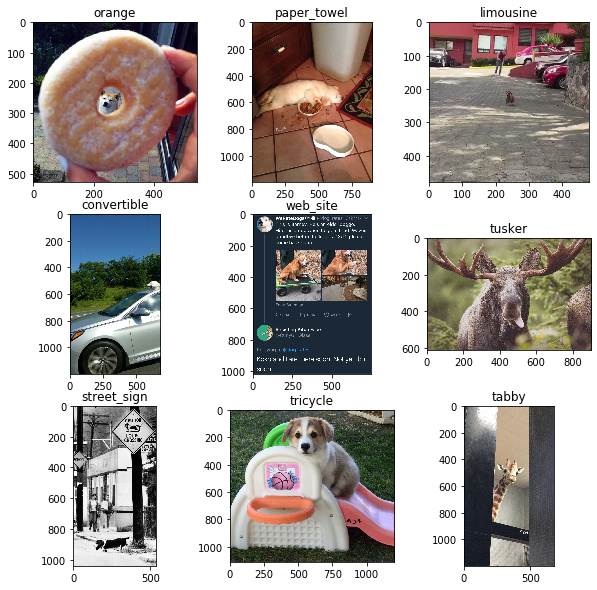

In [79]:
# Reference: https://stackoverflow.com/a/46616645
fig=plt.figure(figsize=(10, 10))

columns = 3
rows = 3

images = mistakes_df.jpg_url.values[:9]
predictions = mistakes_df.prediction_1.values[:9]

for i in range(1, len(images) + 1):
    f = urllib.request.urlopen(images[i-1])
    a = plt.imread(f, format='jpg')
    fig.add_subplot(rows, columns, i)
    plt.title(predictions[i-1], fontsize=12)
    plt.imshow(a)
plt.show()

With those images, it is clear that some images are very hard for the model to predict correctly. The object predicted is part of the image and the model looked only at this object in the all image. Some of them are outliers, that is, images not related with dogs, but other animals.

### Insight 2:

Let's check the correlation of numeric features. For this we will consider the columns:

- rating_numerator (Since the ranking is done by this variable in principle)
- retweet_count
- favorite_count    
- followers_count 

**There is a correlation between the numeric features of our dataset?**

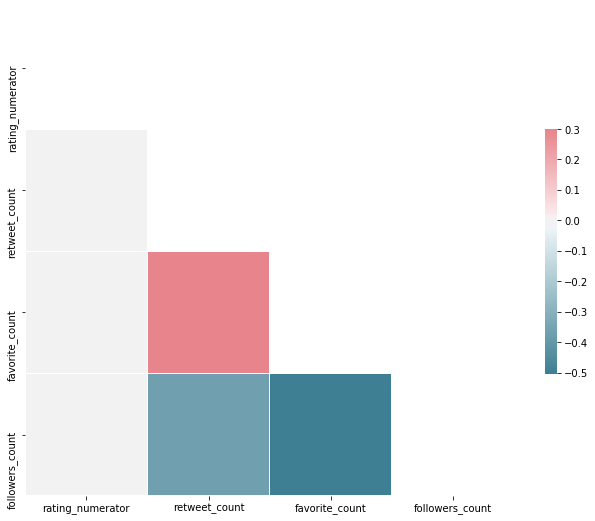

In [80]:
# Compute the correlation matrix
numeric_features = twitter_master_df[['rating_numerator', 'retweet_count', 'favorite_count','followers_count']]
corr = numeric_features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

We can observe that favorite_count feature have positive moderate correlation with retweet_count. The favorite_count have negative moderate correlation with followers_count and retweet_count have negative weak correlation with followers_count. None of them have correlation with rating_numerator

### Insight 3:

Let's check the most popular dog names.

**What are the most popular dog names?**

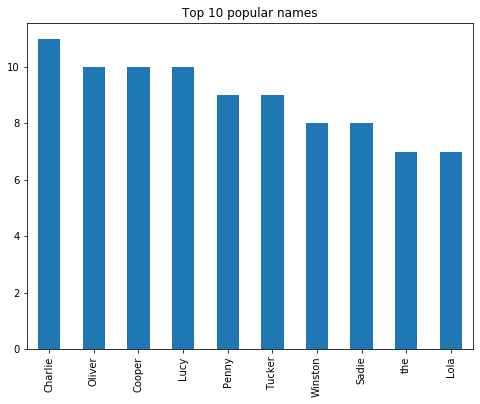

In [81]:
avaible_names_dog = twitter_master_df[twitter_master_df.name != "None"]
avaible_names_dog_without_outlier = avaible_names_dog[avaible_names_dog.name != "a"]
avaible_names_dog_without_outlier.name.value_counts()[:10].plot(kind='bar', title='Top 10 popular names', figsize=(8,6));

The most popular dog name is Charlie, followed by Cooper, Oliver, Lucy and so on. Other names like Penny, Sadie, Lola and a lot of more are also popular.

### Insight 4:

**Which dog stage received the highest ratings on average?**

In [82]:
# groups the dataset by dog stages and computes the average rating for each group
stage_groups = twitter_master_df.groupby('dog_stage')['rating_numerator'].mean()

# sorts the stage groups by descending order
stage_groups = stage_groups.sort_values(ascending=False)
stage_groups

dog_stage
doggo,puppo      13.000000
puppo            12.000000
floofer          12.000000
doggo            11.888889
doggo,pupper     11.000000
doggo,floofer    11.000000
pupper           10.638159
Name: rating_numerator, dtype: float64

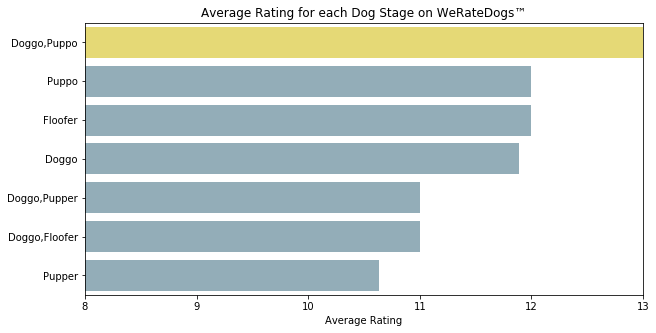

In [83]:
# define axis values
x_axis = list(stage_groups)
y_axis = [i.title() for i in stage_groups.index]

# plot the bar chart
plt.figure(figsize=[10,5])
plt.xlim(8,13)
plt.xlabel('Average Rating')
plt.title('Average Rating for each Dog Stage on WeRateDogs™')
colors = ['#8dafbe' if (x < max(x_axis)) else '#f8e863' for x in x_axis]
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, color="b", palette=colors)
plt.show();

Doggo,Puppo recieved the highest ratings on WeRateDogs